In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,22077,INN22078,2,0,2,1,Meal Plan 1,0,Room_Type 2,194,2018,7,9,Online,0,0,0,86.62,0,Canceled
1,8774,INN08775,2,0,1,3,Meal Plan 1,0,Room_Type 1,1,2018,5,26,Online,0,0,0,136.18,0,Not_Canceled
2,34981,INN34982,2,0,1,5,Meal Plan 1,0,Room_Type 1,90,2018,9,5,Offline,0,0,0,95.00,3,Not_Canceled
3,29743,INN29744,2,0,1,4,Meal Plan 1,0,Room_Type 1,4,2018,12,28,Online,0,0,0,125.00,1,Not_Canceled
4,6465,INN06466,1,0,0,2,Meal Plan 1,0,Room_Type 4,112,2018,8,17,Online,0,0,0,131.40,0,Canceled


In [4]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
# remove unnamed:0 column
df.drop(columns=['Unnamed: 0', 'Booking_ID'], inplace=True)

In [6]:
df.shape

(29020, 18)

#### Data Cleaning
- Checking for missing values
- Checking for duplicated rows

In [7]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.duplicated().sum()

7736

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(21284, 18)

#### Data Exploration
- Examine Columns (one at a time)

In [14]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [11]:
df['booking_status'].value_counts() # data is imbalanced for our dependent variable (booking status)

booking_status
Not_Canceled    15172
Canceled         6112
Name: count, dtype: int64

In [12]:
cat_cols = [
    'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'market_segment_type', 'repeated_guest',
       'booking_status'
            ]

num_cols = [
        'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
            ]

In [13]:
len(cat_cols)


6

In [14]:
len(num_cols)

12

#### Data Analysis

In [15]:
data = df.copy()

In [16]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,2,1,Meal Plan 1,0,Room_Type 2,194,2018,7,9,Online,0,0,0,86.62,0,Canceled
1,2,0,1,3,Meal Plan 1,0,Room_Type 1,1,2018,5,26,Online,0,0,0,136.18,0,Not_Canceled
2,2,0,1,5,Meal Plan 1,0,Room_Type 1,90,2018,9,5,Offline,0,0,0,95.00,3,Not_Canceled
3,2,0,1,4,Meal Plan 1,0,Room_Type 1,4,2018,12,28,Online,0,0,0,125.00,1,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 4,112,2018,8,17,Online,0,0,0,131.40,0,Canceled


#### Univariate Analysis

In [ ]:
def num_plot_dist(df, num_features):
    fig , axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5))
    if len(num_features) == 1:
        axes=[axes]
    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
        axes[i][0].set_title(f'Histogram for {column}') # plot histogram for the columns

        sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f'Box plot for {column}') # plot boxplots for the columns

    plt.tight_layout()
    plt.show()

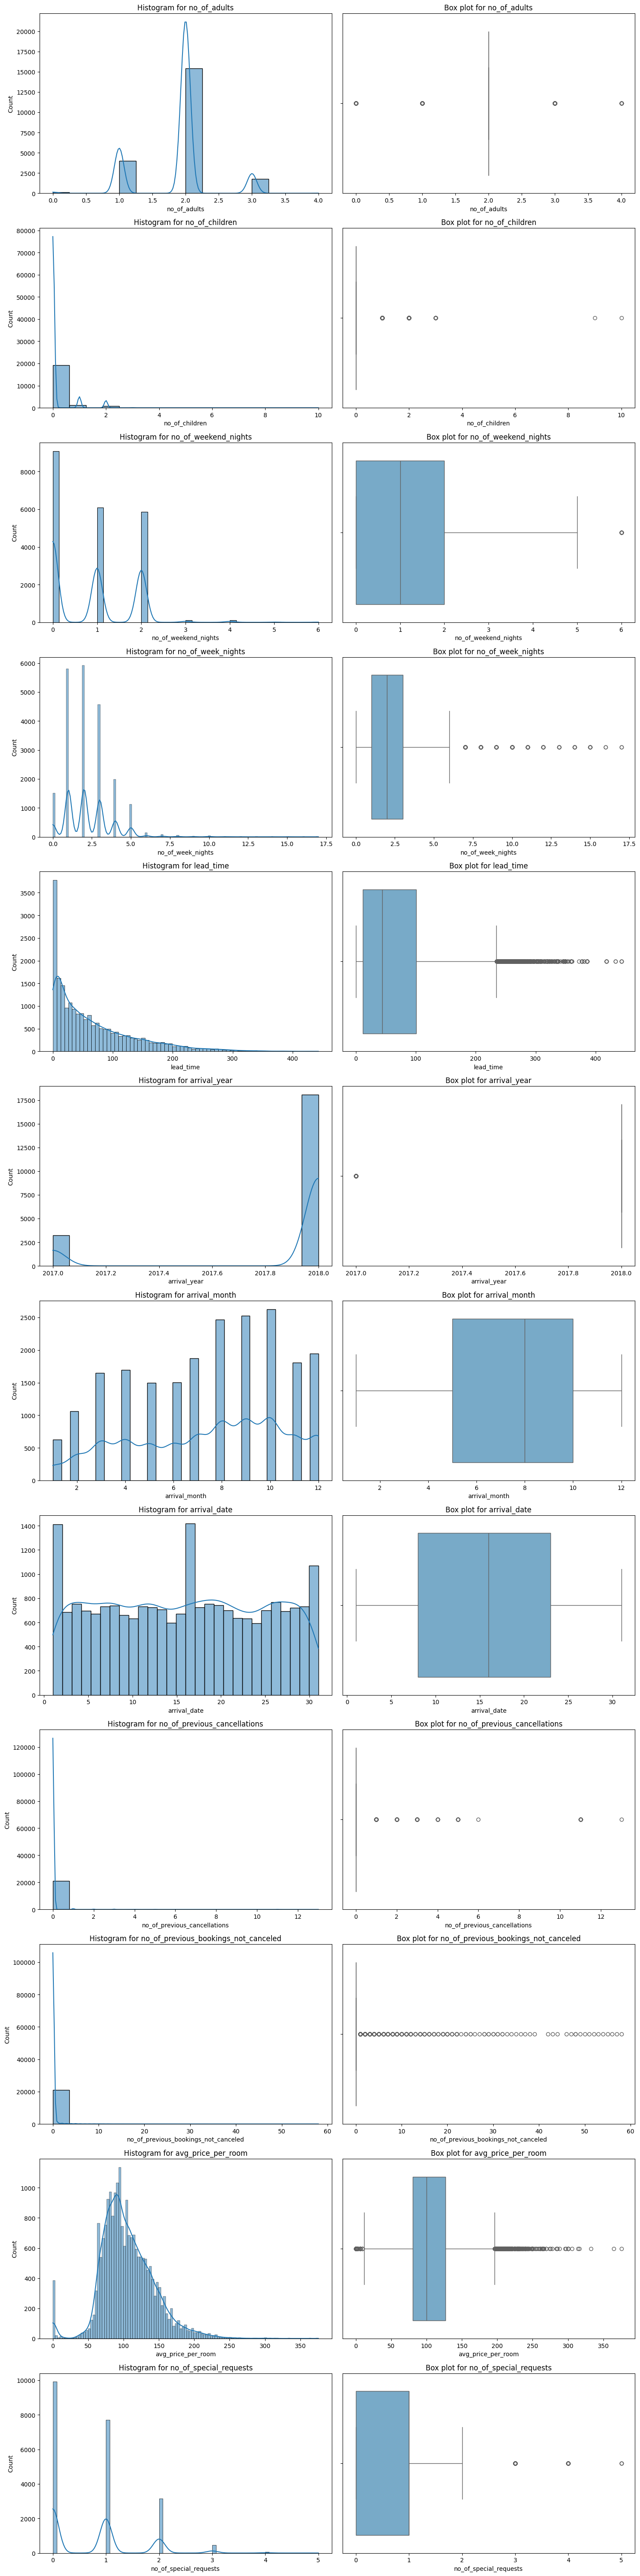

In [20]:
num_plot_dist(data, num_cols)

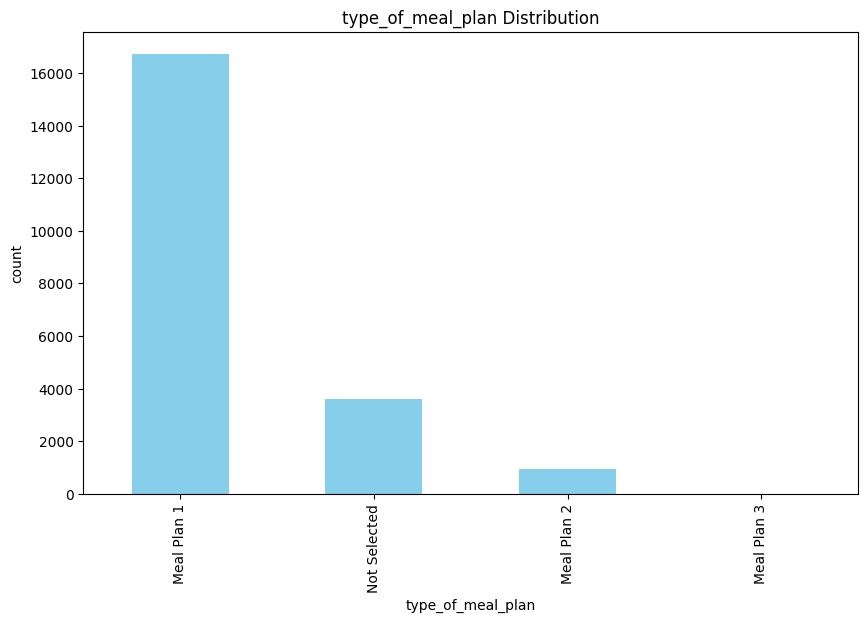

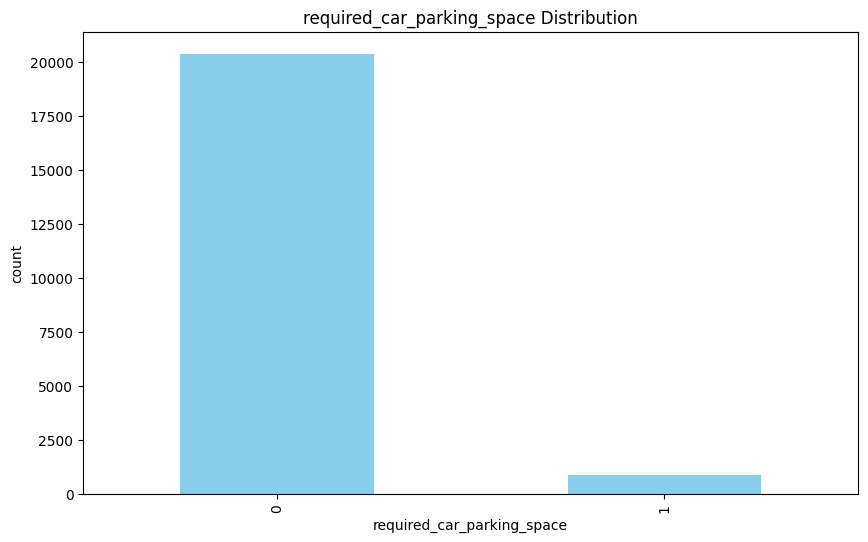

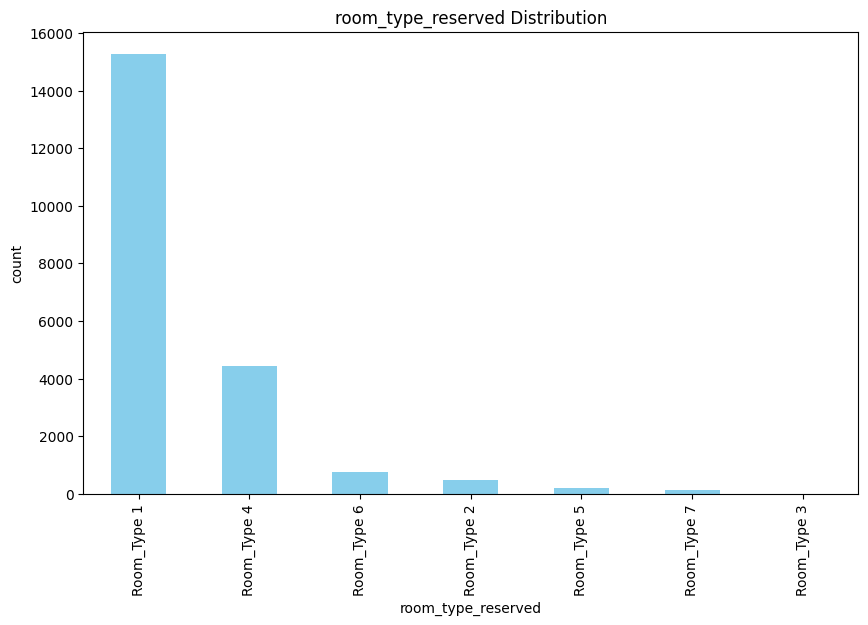

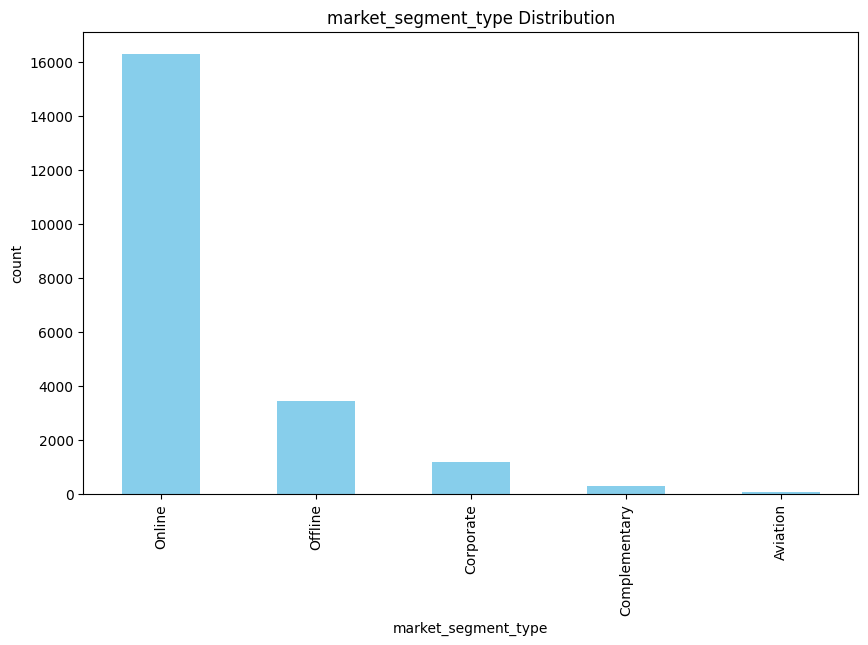

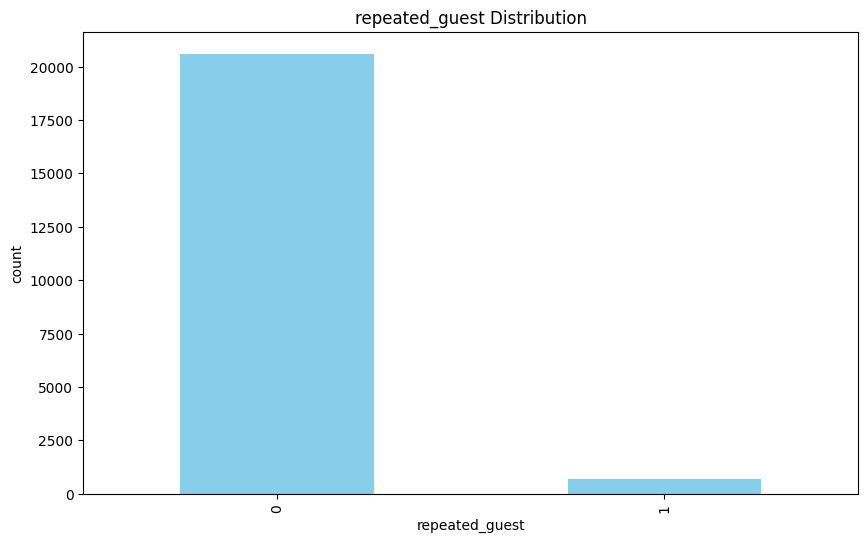

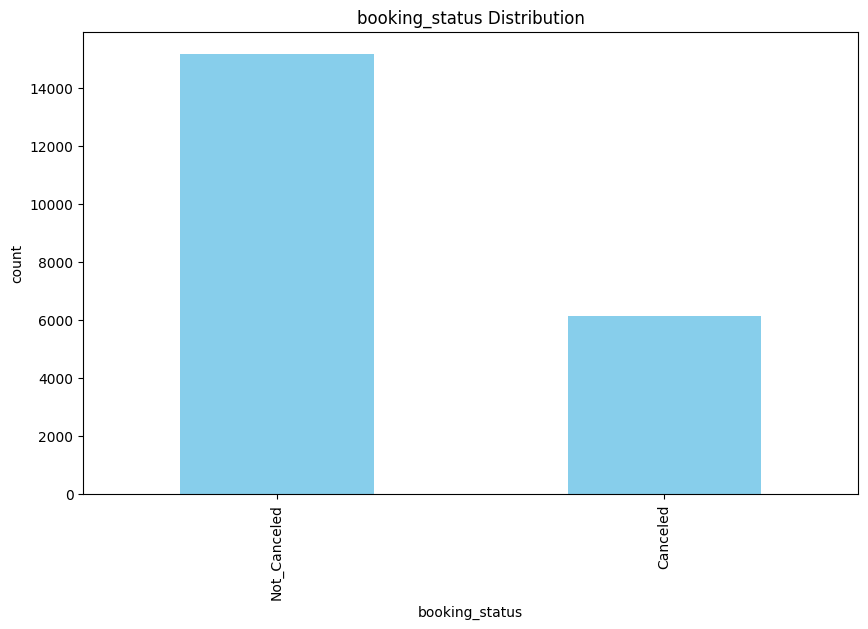

In [21]:
## FOR CATEGORICAL COLUMNS
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar', color="skyblue")
    plt.title(f'{cat_feature} Distribution')
    plt.xlabel(cat_feature)
    plt.ylabel("count")
    plt.show()

#### BiVariate Analysis

In [22]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15,num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
        axes[i].set_title(f"{column} VS {target}")

    
    plt.tight_layout()
    plt.show()

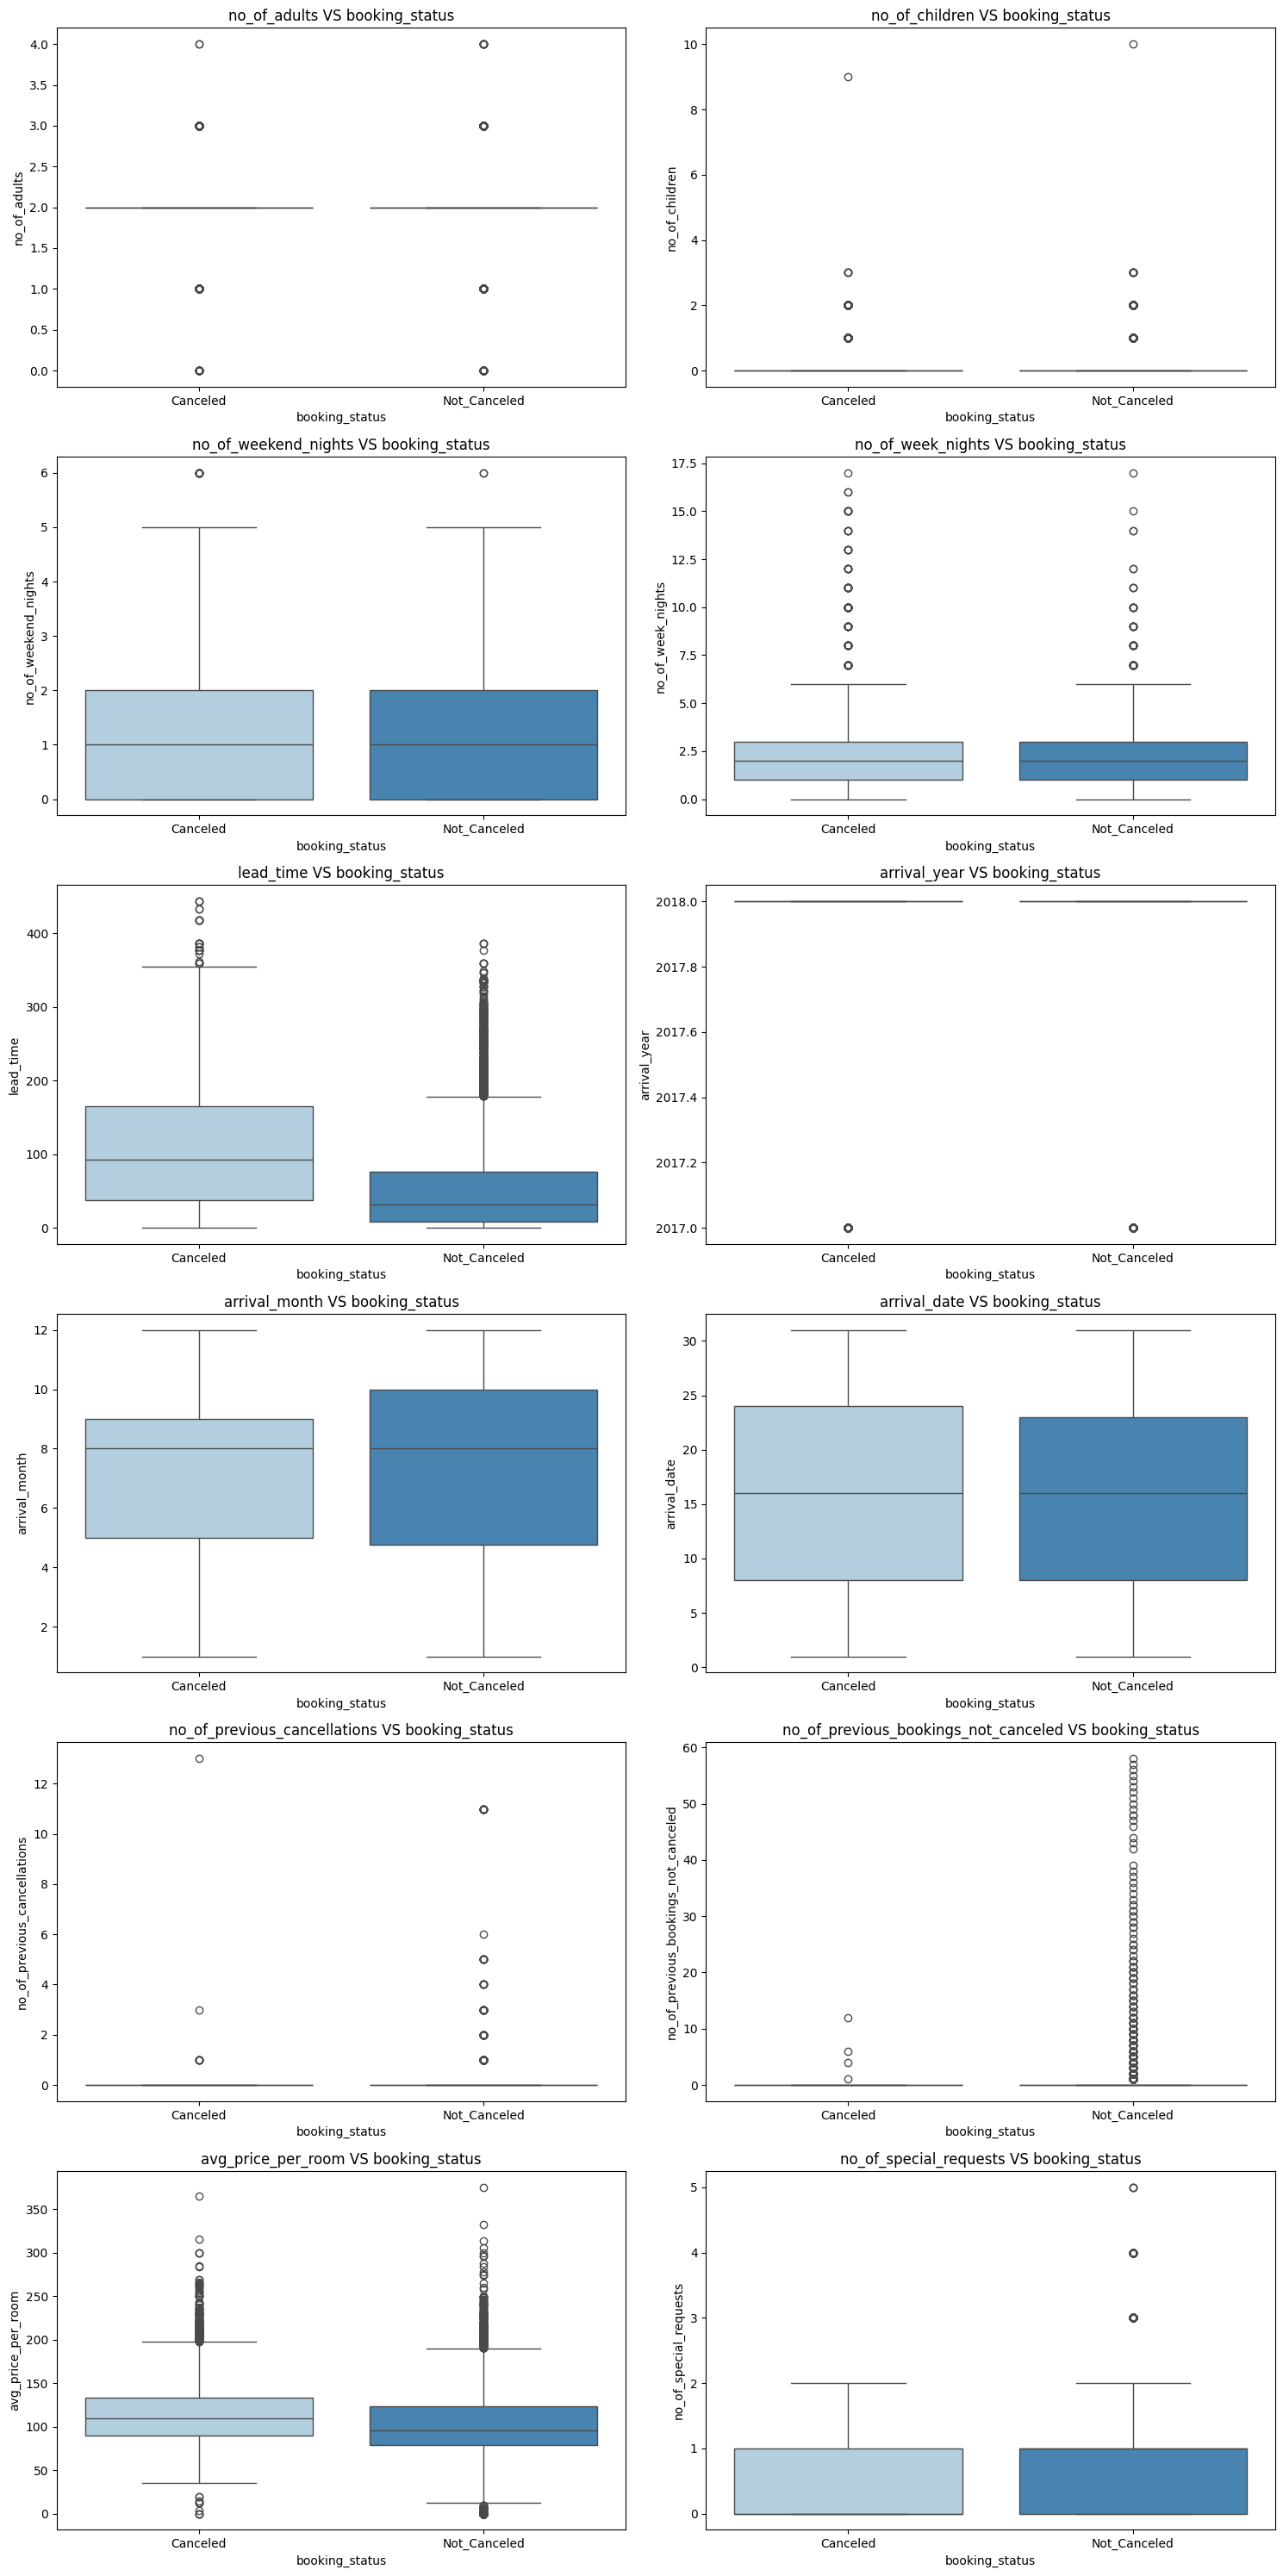

In [23]:
plot_bivariate_num(data, 'booking_status', num_cols)

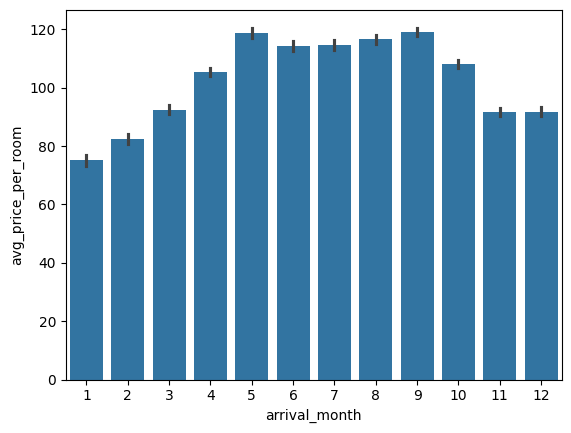

In [25]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=data)
plt.show()

In [30]:
def plot_bivariate_cat(df, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15,num_rows*5))
    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, data=df, palette="Set2", ax=axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

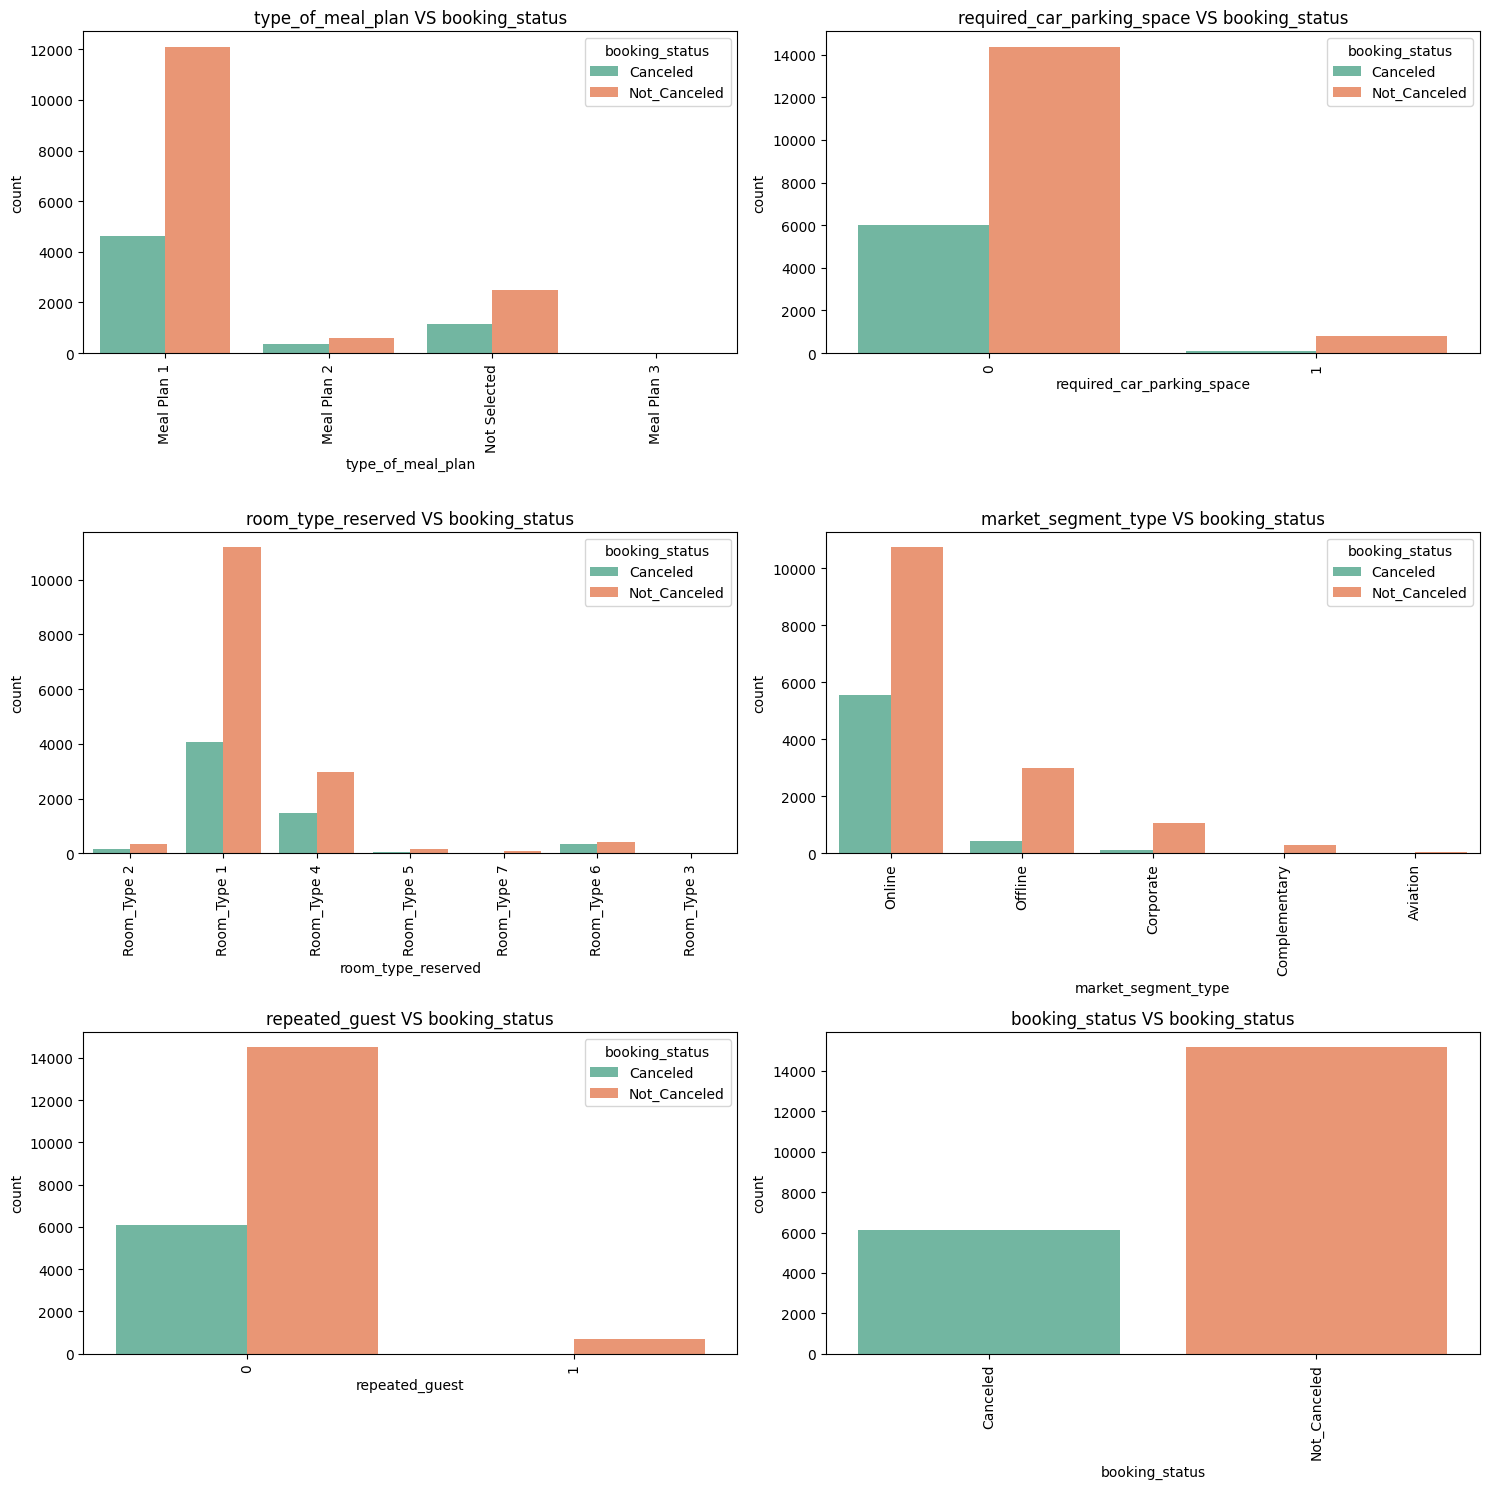

In [31]:
plot_bivariate_cat(data, 'booking_status', cat_cols)

#### Data Preprocessing

In [32]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,2,1,Meal Plan 1,0,Room_Type 2,194,2018,7,9,Online,0,0,0,86.62,0,Canceled
1,2,0,1,3,Meal Plan 1,0,Room_Type 1,1,2018,5,26,Online,0,0,0,136.18,0,Not_Canceled
2,2,0,1,5,Meal Plan 1,0,Room_Type 1,90,2018,9,5,Offline,0,0,0,95.00,3,Not_Canceled
3,2,0,1,4,Meal Plan 1,0,Room_Type 1,4,2018,12,28,Online,0,0,0,125.00,1,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 4,112,2018,8,17,Online,0,0,0,131.40,0,Canceled


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21284 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21284 non-null  int64  
 1   no_of_children                        21284 non-null  int64  
 2   no_of_weekend_nights                  21284 non-null  int64  
 3   no_of_week_nights                     21284 non-null  int64  
 4   type_of_meal_plan                     21284 non-null  object 
 5   required_car_parking_space            21284 non-null  int64  
 6   room_type_reserved                    21284 non-null  object 
 7   lead_time                             21284 non-null  int64  
 8   arrival_year                          21284 non-null  int64  
 9   arrival_month                         21284 non-null  int64  
 10  arrival_date                          21284 non-null  int64  
 11  market_segment_type 

In [34]:
#### Label Encoding
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()

mappings = {}

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

    mappings[col] = {label:code for label, code in zip(le.classes_, le.transform(le.classes_))}

In [36]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': 0,
  'Meal Plan 2': 1,
  'Meal Plan 3': 2,
  'Not Selected': 3},
 'required_car_parking_space': {0: 0, 1: 1},
 'room_type_reserved': {'Room_Type 1': 0,
  'Room_Type 2': 1,
  'Room_Type 3': 2,
  'Room_Type 4': 3,
  'Room_Type 5': 4,
  'Room_Type 6': 5,
  'Room_Type 7': 6},
 'market_segment_type': {'Aviation': 0,
  'Complementary': 1,
  'Corporate': 2,
  'Offline': 3,
  'Online': 4},
 'repeated_guest': {0: 0, 1: 1},
 'booking_status': {'Canceled': 0, 'Not_Canceled': 1}}

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21284 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21284 non-null  int64  
 1   no_of_children                        21284 non-null  int64  
 2   no_of_weekend_nights                  21284 non-null  int64  
 3   no_of_week_nights                     21284 non-null  int64  
 4   type_of_meal_plan                     21284 non-null  int64  
 5   required_car_parking_space            21284 non-null  int64  
 6   room_type_reserved                    21284 non-null  int64  
 7   lead_time                             21284 non-null  int64  
 8   arrival_year                          21284 non-null  int64  
 9   arrival_month                         21284 non-null  int64  
 10  arrival_date                          21284 non-null  int64  
 11  market_segment_type 

#### Check for MultiCollinearity

happens when two or more features (independent variables) in your dataset are highly correlated — meaning they move together or give similar information.

VIF > 5; indicates multicollinearity

In [39]:
!pip -q install statsmodels


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [43]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [44]:
vif_data

,feature,VIF
0,const,4.097369e+07
1,no_of_adults,1.335360e+00
2,no_of_children,1.282174e+00
3,no_of_weekend_nights,1.077962e+00
4,no_of_week_nights,1.129498e+00
5,type_of_meal_plan,1.176394e+00
6,required_car_parking_space,1.033233e+00
7,room_type_reserved,1.561214e+00
8,lead_time,1.403576e+00
9,arrival_year,1.288064e+00


In [45]:
corr = df.corr()

<Axes: >

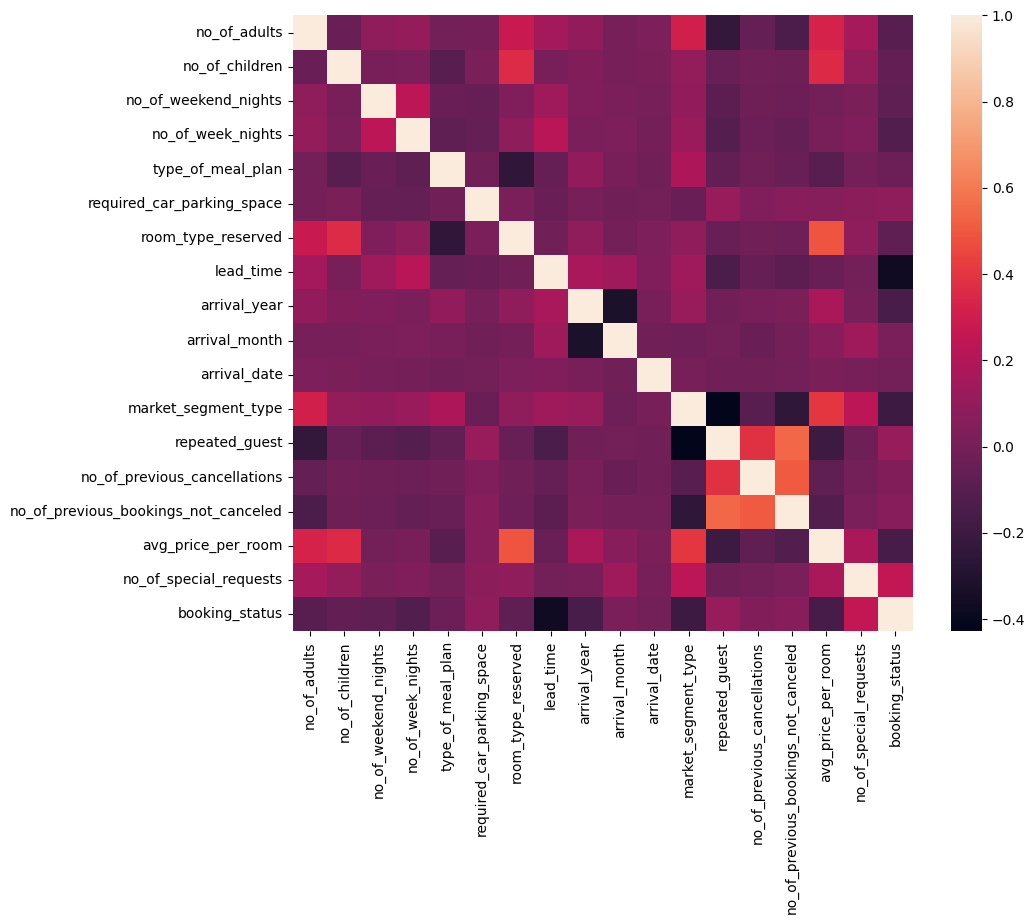

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(corr)

In [50]:
### Check for Skewness
skewness = df.skew()

In [51]:
skewness

no_of_adults                            -0.284722
no_of_children                           3.982788
no_of_weekend_nights                     0.664274
no_of_week_nights                        1.635829
type_of_meal_plan                        1.657230
required_car_parking_space               4.593046
room_type_reserved                       1.373702
lead_time                                1.416412
arrival_year                            -1.952607
arrival_month                           -0.290581
arrival_date                             0.009808
market_segment_type                     -2.347816
repeated_guest                           5.306047
no_of_previous_cancellations            22.155569
no_of_previous_bookings_not_canceled    17.013998
avg_price_per_room                       0.524652
no_of_special_requests                   0.913699
booking_status                          -0.940905
dtype: float64

In [58]:
## Fix skewness by doing log transformation
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [59]:
skewness

no_of_adults                            -0.284722
no_of_children                           3.982788
no_of_weekend_nights                     0.664274
no_of_week_nights                        1.635829
type_of_meal_plan                        1.657230
required_car_parking_space               4.593046
room_type_reserved                       1.373702
lead_time                                1.416412
arrival_year                            -1.952607
arrival_month                           -0.290581
arrival_date                             0.009808
market_segment_type                     -2.347816
repeated_guest                           5.306047
no_of_previous_cancellations            22.155569
no_of_previous_bookings_not_canceled    17.013998
avg_price_per_room                       0.524652
no_of_special_requests                   0.913699
booking_status                          -0.940905
dtype: float64

In [60]:
#### Imbalanced Data
df['booking_status'].value_counts()

booking_status
1    15172
0     6112
Name: count, dtype: int64

In [61]:
## Option 1: Under Sampling ( but not enough data)
## OPtion 2: Over Sampling

X = df.drop(columns='booking_status')
y = df['booking_status']

In [62]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,2,1,0,0,1,194,2018,7,9,4,0.0,0.0,0.0,86.62,0
1,2,0,1,3,0,0,0,1,2018,5,26,4,0.0,0.0,0.0,136.18,0
2,2,0,1,5,0,0,0,90,2018,9,5,3,0.0,0.0,0.0,95.00,3
3,2,0,1,4,0,0,0,4,2018,12,28,4,0.0,0.0,0.0,125.00,1
4,1,0,0,2,0,0,3,112,2018,8,17,4,0.0,0.0,0.0,131.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29014,2,0,0,2,0,0,0,12,2018,1,19,3,0.0,0.0,0.0,80.00,0
29015,2,0,0,2,0,0,0,89,2018,4,1,4,0.0,0.0,0.0,87.30,1
29016,2,0,2,3,0,0,0,178,2018,6,4,4,0.0,0.0,0.0,100.30,0
29017,2,0,2,2,0,1,3,8,2018,10,7,4,0.0,0.0,0.0,179.00,2


In [63]:
y

0        0
1        1
2        1
3        1
4        0
        ..
29014    1
29015    1
29016    0
29017    1
29019    1
Name: booking_status, Length: 21284, dtype: int64

In [64]:
from imblearn.over_sampling import SMOTE

In [65]:
smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X,y)

In [66]:
y_res.value_counts()

booking_status
0    15172
1    15172
Name: count, dtype: int64

In [67]:
df.shape

(21284, 18)

In [68]:
balanced_data = pd.DataFrame(X_res, columns=X.columns)
balanced_data['booking_status'] = y_res

In [69]:
balanced_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,2,1,0,0,1,194,2018,7,9,4,0.0,0.0,0.0,86.62,0,0
1,2,0,1,3,0,0,0,1,2018,5,26,4,0.0,0.0,0.0,136.18,0,1
2,2,0,1,5,0,0,0,90,2018,9,5,3,0.0,0.0,0.0,95.00,3,1
3,2,0,1,4,0,0,0,4,2018,12,28,4,0.0,0.0,0.0,125.00,1,1
4,1,0,0,2,0,0,3,112,2018,8,17,4,0.0,0.0,0.0,131.40,0,0


In [71]:
balanced_data.shape

(30344, 18)

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
model = RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [75]:
feature_importance = model.feature_importances_
feature_importance

array([2.00829373e-02, 9.15348934e-03, 3.69739300e-02, 5.73380832e-02,
       1.62046474e-02, 9.30647583e-03, 1.89243771e-02, 2.86011819e-01,
       1.87967755e-02, 8.12947707e-02, 9.80415870e-02, 6.35354962e-02,
       2.67462863e-03, 2.25529501e-04, 1.71023767e-03, 1.59528821e-01,
       1.20196394e-01])

In [ ]:
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
})

In [79]:
feature_importance_df.sort_values(by='importance', ascending=False)

,feature,importance
7,lead_time,0.286012
15,avg_price_per_room,0.159529
16,no_of_special_requests,0.120196
10,arrival_date,0.098042
9,arrival_month,0.081295
11,market_segment_type,0.063535
3,no_of_week_nights,0.057338
2,no_of_weekend_nights,0.036974
0,no_of_adults,0.020083
6,room_type_reserved,0.018924


In [80]:
top_feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

In [ ]:
top_10_features = top_feature_importance_df['feature'].head(10).values

In [82]:
top_10_features

7                  lead_time
15        avg_price_per_room
16    no_of_special_requests
10              arrival_date
9              arrival_month
11       market_segment_type
3          no_of_week_nights
2       no_of_weekend_nights
0               no_of_adults
6         room_type_reserved
Name: feature, dtype: object

In [85]:
## To output columns
top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [86]:
top_10_df.head()

,lead_time,avg_price_per_room,no_of_special_requests,arrival_date,arrival_month,market_segment_type,no_of_week_nights,no_of_weekend_nights,no_of_adults,room_type_reserved,booking_status
0,194,86.62,0,9,7,4,1,2,2,1,0
1,1,136.18,0,26,5,4,3,1,2,0,1
2,90,95.00,3,5,9,3,5,1,2,0,1
3,4,125.00,1,28,12,4,4,1,2,0,1
4,112,131.40,0,17,8,4,2,0,1,3,0


In [87]:
top_10_df.columns

Index(['lead_time', 'avg_price_per_room', 'no_of_special_requests',
       'arrival_date', 'arrival_month', 'market_segment_type',
       'no_of_week_nights', 'no_of_weekend_nights', 'no_of_adults',
       'room_type_reserved', 'booking_status'],
      dtype='object')

In [94]:
df = top_10_df.copy()

#### Model Selection

In [92]:
pip -q install xgboost lightgbm


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [95]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [107]:
classifiers = {
    'Random Forest' : RandomForestClassifier(random_state=42),
    'LogisticRegression' : LogisticRegression(random_state=42),
    'Gradient Boosting' : GradientBoostingClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'Decision Tree' : DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes' : GaussianNB(),
    'XGboost' : XGBClassifier(random_state=42),
    'Adaboost' : AdaBoostClassifier(random_state=42),
    'LGBM' : LGBMClassifier(random_state=42)
}

In [108]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1_Score" : []
}

In [109]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1_Score'].append(f1)

[LightGBM] [Info] Number of positive: 12127, number of negative: 4900
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 17027, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.712222 -> initscore=0.906199
[LightGBM] [Info] Start training from score 0.906199


In [110]:
metrics_df = pd.DataFrame(metrics)

In [111]:
metrics_df

,Model,Accuracy,Precision,Recall,F1_Score
0,Random Forest,0.845431,0.873085,0.917241,0.894619
1,LogisticRegression,0.780362,0.807043,0.910673,0.855732
2,Gradient Boosting,0.841438,0.869619,0.915599,0.892017
3,Support Vector Classifier,0.768851,0.773996,0.955993,0.855422
4,Decision Tree,0.791637,0.865267,0.839409,0.852142
5,KNN,0.747240,0.791186,0.878489,0.832555
6,Naive Bayes,0.774489,0.826495,0.866667,0.846105
7,XGboost,0.850834,0.878217,0.918883,0.898090
8,Adaboost,0.814423,0.854895,0.891954,0.873031
9,LGBM,0.850364,0.877193,0.919540,0.897868


In [112]:
#### TRAIN RF MODEL
from sklearn.model_selection import  RandomizedSearchCV
from scipy.stats import randint

In [113]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [115]:
rf = RandomForestClassifier(random_state=42)

In [116]:
params_dist = {
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,50),
    'min_samples_split' : randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True, False]
}

In [119]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [120]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.3s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.0s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x13087a490>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x13505f810>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x13505f850>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x134372150>},
                   random_state=42, scoring='accuracy', verbose=2)

In [121]:
random_search.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 199}

In [122]:
best_rf_model = random_search.best_estimator_

In [123]:
y_pred = best_rf_model.predict(X_test)

In [124]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [125]:
accuracy

0.8489546629081512

In [126]:
precision

0.8697660098522167

In [127]:
recall

0.9277504105090312

In [128]:
### Save model
import joblib

joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [129]:
# load model
load_model = joblib.load("random_forest.pkl")

In [130]:
X_train[0:1]

,lead_time,avg_price_per_room,no_of_special_requests,arrival_date,arrival_month,market_segment_type,no_of_week_nights,no_of_weekend_nights,no_of_adults,room_type_reserved
11625,177,90.9,0,30,10,3,1,2,2,0


In [133]:
new_data = np.array([177, 90.9, 0, 30, 10, 3, 1, 2, 2, 0]).reshape(1,-1)

In [134]:
predictions = load_model.predict(new_data)